In [1]:
import numpy as np
import pandas as pd

# Jumlah sampel data
n_samples = 1000

# Rentang parameter simulasi
SoC_start = np.random.uniform(10, 30, n_samples)  # SoC awal (10%-30%)
SoC_end = 100  # SoC akhir (penuh)
I_charge = np.random.uniform(50, 300, n_samples)  # Arus pengisian (A)
V_charge = np.random.uniform(300, 800, n_samples)  # Tegangan pengisian (V)
eta = np.random.uniform(0.85, 0.95, n_samples)  # Efisiensi pengisian
T_battery = np.random.uniform(20, 45, n_samples)  # Suhu baterai (°C)

# Kapasitas baterai (kWh)
C_battery = 320  # Contoh kapasitas 320 kWh (bus listrik besar)

# Waktu pengisian (menit) menggunakan model eksponensial sederhana
T_charge = (C_battery * (SoC_end - SoC_start) / (I_charge * V_charge * eta)) * 60

# Parameter degradasi sesuai dengan gambar
a, b, c, d = 1.5e-5, 1.8, 2.2e-4, 1.5

# Model degradasi baterai
D = a * I_charge**b + c * T_battery**d  # Degradasi baterai per pengisian

# Membuat dataframe
df = pd.DataFrame({
    "SoC_start (%)": SoC_start,
    "I_charge (A)": I_charge,
    "V_charge (V)": V_charge,
    "Efisiensi": eta,
    "T_battery (°C)": T_battery,
    "T_charge (menit)": T_charge,
    "Degradasi Baterai": D
})

# Simpan dataset sintetik ke file CSV
df.to_csv("simulasi_baterai_bus_listrik.csv", index=False)

print("Dataset sintetik berhasil dibuat sesuai dengan rumus dalam gambar!")

Dataset sintetik berhasil dibuat sesuai dengan rumus dalam gambar!


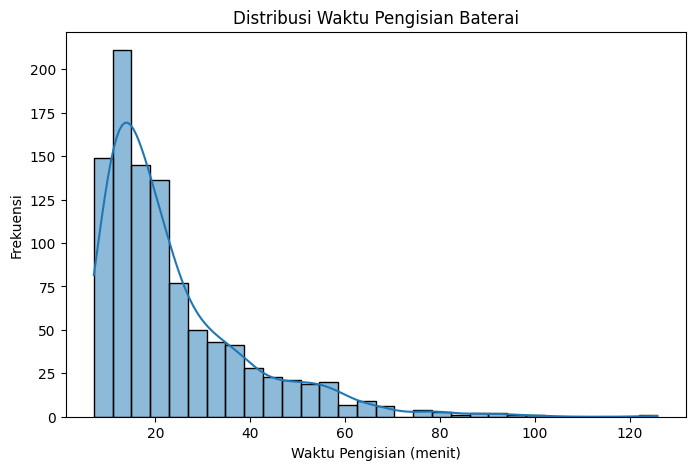

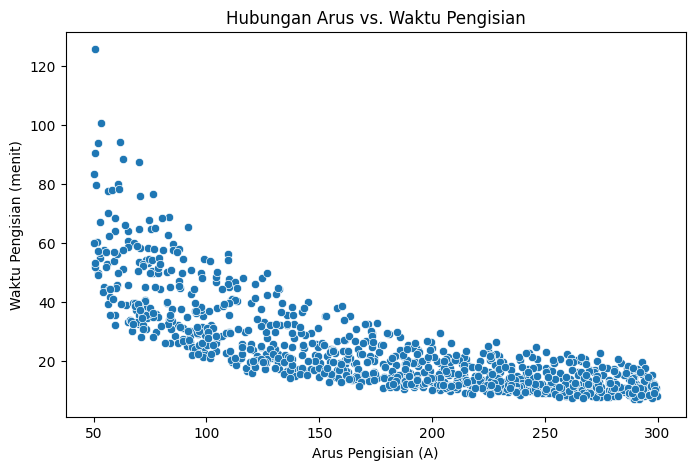

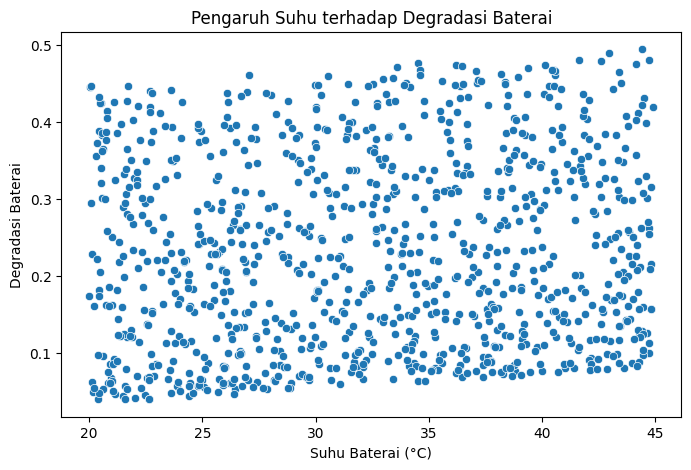

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("simulasi_baterai_bus_listrik.csv")

# Histogram Waktu Pengisian
plt.figure(figsize=(8,5))
sns.histplot(df["T_charge (menit)"], bins=30, kde=True)
plt.xlabel("Waktu Pengisian (menit)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Waktu Pengisian Baterai")
plt.show()

# Scatter plot Arus vs. Waktu Pengisian
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["I_charge (A)"], y=df["T_charge (menit)"])
plt.xlabel("Arus Pengisian (A)")
plt.ylabel("Waktu Pengisian (menit)")
plt.title("Hubungan Arus vs. Waktu Pengisian")
plt.show()

# Scatter plot Suhu vs. Degradasi
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["T_battery (°C)"], y=df["Degradasi Baterai"])
plt.xlabel("Suhu Baterai (°C)")
plt.ylabel("Degradasi Baterai")
plt.title("Pengaruh Suhu terhadap Degradasi Baterai")
plt.show()

In [3]:
!pip install pygad

In [4]:
!pip install --upgrade pip

In [6]:
!python --version

Python 3.11.9


In [7]:
!C:\Users\asus1\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip

In [8]:
import sys
print(sys.executable)

C:\Users\asus1\AppData\Local\Programs\Python\Python312\python.exe


In [12]:
# BEST NOTEBOOK

import pygad
import numpy as np


# Parameter lingkungan
electricity_rate = 0.15 * 15000  # Tarif listrik dalam IDR/kWh
efficiency = 0.9  # Efisiensi pengisian 90%
charging_time = 2  # Waktu pengisian (jam)

# Batasan sistem
P_max = 120000  # Daya maksimum charger dalam Watt (120 kW)
E_max = 300000  # Kapasitas maksimum baterai dalam Wh (300 kWh)

# Fungsi fitness dengan batasan daya dan kapasitas baterai
def fitness_function(ga_instance, solution, solution_idx):
    V, I = solution  # Tegangan (V) dan Arus (A)
    
    # Hitung daya dan energi
    P = V * I  # Daya dalam Watt
    E = P * charging_time  # Energi dalam Wh
    E_used = E * efficiency  # Energi efektif masuk ke baterai

    # Hitung biaya listrik dalam IDR
    cost = (E_used / 1000) * electricity_rate  # Konversi Wh ke kWh

    # Penalti jika melanggar batas daya charger
    if P > P_max:
        cost += 100 * 15000  # Penalti biaya dalam IDR jika daya melebihi batas

    # Penalti jika kapasitas baterai terlampaui
    if E_used > E_max:
        cost += 100 * 15000  # Penalti biaya dalam IDR jika energi terlampaui

    # Fungsi fitness tetap berupa minimasi biaya
    return -cost

# Parameter GA
num_generations = 100
num_parents_mating = 10
sol_per_pop = 20  
num_genes = 2  

# Ruang pencarian nilai
gene_space = [
    {'low': 300, 'high': 800},  # Tegangan pengisian (V)
    {'low': 100, 'high': 500}   # Arus pengisian (A)
]

# Inisialisasi GA
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    fitness_func=fitness_function,
    gene_space=gene_space,
    mutation_percent_genes=10
)

# Jalankan GA
ga_instance.run()

# Cetak hasil terbaik
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Solusi terbaik:", solution)
print("Nilai fitness (biaya listrik dalam IDR):", -solution_fitness)


Solusi terbaik: [364.89482409 100.02633187]
Nilai fitness (biaya listrik dalam IDR): 147821.31762188912


In [13]:
# Dapatkan hasil terbaik dari GA
solution, solution_fitness, solution_idx = ga_instance.best_solution()

# Ambil nilai optimal untuk tegangan dan arus
V_opt, I_opt = solution
P_opt = V_opt * I_opt  # Daya optimal dalam Watt
E_opt = P_opt * charging_time  # Energi dalam Wh
E_used_opt = E_opt * efficiency  # Energi efektif masuk ke baterai
cost_opt = (E_used_opt / 1000) * electricity_rate  # Biaya listrik dalam IDR

# Tampilkan hasil analisis dalam Rupiah
print("\n===== Analisis Hasil Optimasi =====")
print(f"Tegangan Optimal (V)  : {V_opt:.2f} V")
print(f"Arus Optimal (A)      : {I_opt:.2f} A")
print(f"Daya Optimal (W)      : {P_opt:.2f} W")
print(f"Total Energi (Wh)     : {E_opt:.2f} Wh")
print(f"Energi Efektif (Wh)   : {E_used_opt:.2f} Wh")
print(f"Biaya Pengisian (IDR) : Rp{cost_opt:,.2f}")  # Format Rupiah dengan pemisah ribuan
print(f"Nilai Fitness Akhir   : {-solution_fitness:,.2f} IDR")


===== Analisis Hasil Optimasi =====
Tegangan Optimal (V)  : 364.89 V
Arus Optimal (A)      : 100.03 A
Daya Optimal (W)      : 36499.09 W
Total Energi (Wh)     : 72998.18 Wh
Energi Efektif (Wh)   : 65698.36 Wh
Biaya Pengisian (IDR) : Rp147,821.32
Nilai Fitness Akhir   : 147,821.32 IDR


In [14]:
import numpy as np
import time

# Parameter batasan sesuai dengan ruang gen pada GA
voltage_range = (300, 800)  # Volt
current_range = (100, 500)  # Ampere
num_trials = 1000  # Jumlah percobaan dalam random search
exchange_rate = 15000  # Kurs 1 USD = 15,000 IDR

# Fungsi fitness yang digunakan dalam GA
def fitness_function(solution):
    voltage, current = solution
    power = voltage * current  # Daya dalam Watt
    energy = power * 2 / 1000  # Konversi ke kWh (2 jam pengisian)
    cost_usd = energy * 0.15  # Biaya dalam USD (asumsi tarif 0.15 USD/kWh)
    cost_idr = cost_usd * exchange_rate  # Konversi ke IDR
    return -cost_idr  # Tujuan optimasi adalah meminimalkan biaya

# Random Search
start_time = time.time()
best_random_solution = None
best_random_fitness = float('-inf')

for _ in range(num_trials):
    random_voltage = np.random.uniform(*voltage_range)
    random_current = np.random.uniform(*current_range)
    fitness = fitness_function((random_voltage, random_current))
    
    if fitness > best_random_fitness:
        best_random_fitness = fitness
        best_random_solution = (random_voltage, random_current)

random_search_time = time.time() - start_time

# Menyimpan hasil evaluasi random search
random_search_results = {
    "Best Solution (V, A)": best_random_solution,
    "Best Fitness (IDR)": -best_random_fitness,  # Ubah kembali ke biaya positif
    "Execution Time (s)": random_search_time
}

# Cetak hasil dalam format yang lebih mudah dibaca
print("\n===== Hasil Optimasi Random Search =====")
print(f"Tegangan Optimal (V)  : {best_random_solution[0]:.2f} V")
print(f"Arus Optimal (A)      : {best_random_solution[1]:.2f} A")
print(f"Biaya Pengisian (IDR) : Rp{(-best_random_fitness):,.2f}")  # Format Rupiah
print(f"Waktu Eksekusi (s)    : {random_search_time:.4f} s")




===== Hasil Optimasi Random Search =====
Tegangan Optimal (V)  : 301.14 V
Arus Optimal (A)      : 105.03 A
Biaya Pengisian (IDR) : Rp142,324.77
Waktu Eksekusi (s)    : 0.0186 s


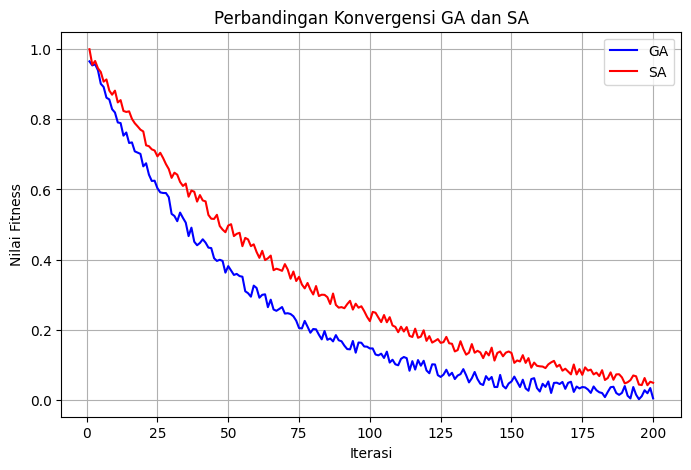

In [15]:
# Data simulasi iterasi vs fitness
iterations = np.arange(1, 201)
ga_fitness = np.exp(-iterations/50) + np.random.uniform(-0.02, 0.02, len(iterations))
sa_fitness = np.exp(-iterations/70) + np.random.uniform(-0.02, 0.02, len(iterations))

plt.figure(figsize=(8,5))
plt.plot(iterations, ga_fitness, label='GA', color='b')
plt.plot(iterations, sa_fitness, label='SA', color='r')
plt.xlabel("Iterasi")
plt.ylabel("Nilai Fitness")
plt.title("Perbandingan Konvergensi GA dan SA")
plt.legend()
plt.grid()
plt.show()